# Factors Contributing to the Success of the Marvel Movie Franchise
#### Goals of this data analysis: To analyze the profitability factors of a given movie from the Marvel franchise


# Questions asked:

<ul>
    <li>What factors contribute to the most success within a movie?</li>
    <li>What is the ideal runtime for a movie?</li>
    <li>What average vote correlates to the highest revenue?</li>
    <li>What is the ideal budget for a movie?</li>
</ul>

# Setup

#### Importing the required libraries

In [1]:
import jupytext as jupytext
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import mstats

#### Reading the original database

In [2]:
df = pd.read_csv("C:\Movies Database\TMDB_movie_dataset_v11.csv")
pd.set_option('display.max_columns', None)

#### Set the amount of columns displayed

In [3]:
pd.set_option('display.width', None)

#### Filter movies based on studio (Marvel Studios)

In [4]:
marvel_movies = df[df['production_companies'].str.contains("Marvel Studios", na=False)]

# Data Cleaning!

#### Check for any missing values

In [5]:
for col in marvel_movies:
    percent_missing = np.mean(marvel_movies[col].isnull())
    print('{} - {}%'.format(col, round(percent_missing * 100)))

id - 0%
title - 0%
vote_average - 0%
vote_count - 0%
status - 0%
release_date - 14%
revenue - 0%
runtime - 0%
adult - 0%
backdrop_path - 24%
budget - 0%
homepage - 35%
imdb_id - 23%
original_language - 0%
original_title - 0%
overview - 1%
popularity - 0%
poster_path - 13%
tagline - 55%
genres - 5%
production_companies - 0%
production_countries - 4%
spoken_languages - 5%
keywords - 16%


#### Remove all null values from data

In [6]:
marvel_movies = marvel_movies.dropna()


#### Drop duplicates

In [7]:
marvel_movies.drop_duplicates()

,id,title,vote_average,vote_count,status,release_date,revenue,runtime,adult,backdrop_path,budget,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,tagline,genres,production_companies,production_countries,spoken_languages,keywords
4,24428,The Avengers,7.710,29166,Released,2012-04-25,1518815515,143,False,/9BBTo63ANSmhC4e6r62OJFuK2GL.jpg,220000000,https://www.marvel.com/movies/the-avengers,tt0848228,en,The Avengers,When an unexpected enemy emerges and threatens...,98.082,/RYMX2wcKCBAr24UyPD7xwmjaTn.jpg,Some assembly required.,"Science Fiction, Action, Adventure",Marvel Studios,United States of America,"English, Hindi, Russian","new york city, superhero, shield, based on com..."
6,299536,Avengers: Infinity War,8.255,27713,Released,2018-04-25,2052415039,149,False,/mDfJG3LC3Dqb67AZ52x3Z0jU0uB.jpg,300000000,https://www.marvel.com/movies/avengers-infinit...,tt4154756,en,Avengers: Infinity War,As the Avengers and their allies have continue...,154.340,/7WsyChQLEftFiDOVTGkv3hFpyyt.jpg,An entire universe. Once and for all.,"Adventure, Action, Science Fiction",Marvel Studios,United States of America,"English, Xhosa","sacrifice, magic, superhero, based on comic, s..."
8,118340,Guardians of the Galaxy,7.906,26638,Released,2014-07-30,772776600,121,False,/uLtVbjvS1O7gXL8lUOwsFOH4man.jpg,170000000,http://marvel.com/guardians,tt2015381,en,Guardians of the Galaxy,"Light years from Earth, 26 years after being a...",33.255,/r7vmZjiyZw9rpJMQJdXpjgiCOk9.jpg,All heroes start somewhere.,"Action, Science Fiction, Adventure",Marvel Studios,United States of America,English,"spacecraft, based on comic, space, orphan, adv..."
12,1726,Iron Man,7.640,24874,Released,2008-04-30,585174222,126,False,/cyecB7godJ6kNHGONFjUyVN9OX5.jpg,140000000,https://www.marvel.com/movies/iron-man,tt0371746,en,Iron Man,"After being held captive in an Afghan cave, bi...",72.897,/78lPtwv72eTNqFW9COBYI0dWDJa.jpg,Heroes aren't born. They're built.,"Action, Science Fiction, Adventure",Marvel Studios,United States of America,"English, Persian, Urdu, Arabic","middle east, superhero, arms dealer, malibu, b..."
15,299534,Avengers: Endgame,8.263,23857,Released,2019-04-24,2800000000,181,False,/7RyHsO4yDXtBv1zUU3mTpHeQ0d5.jpg,356000000,https://www.marvel.com/movies/avengers-endgame,tt4154796,en,Avengers: Endgame,After the devastating events of Avengers: Infi...,91.756,/or06FN3Dka5tukK1e9sl16pB3iy.jpg,Avenge the fallen.,"Adventure, Science Fiction, Action",Marvel Studios,United States of America,"English, Japanese, Xhosa","superhero, time travel, space travel, time mac..."
23,99861,Avengers: Age of Ultron,7.276,21754,Released,2015-04-22,1405403694,141,False,/6YwkGolwdOMNpbTOmLjoehlVWs5.jpg,365000000,http://marvel.com/movies/movie/193/avengers_ag...,tt2395427,en,Avengers: Age of Ultron,When Tony Stark tries to jumpstart a dormant p...,96.565,/4ssDuvEDkSArWEdyBl2X5EHvYKU.jpg,A new age has come.,"Action, Adventure, Science Fiction",Marvel Studios,United States of America,English,"artificial intelligence (a.i.), superhero, bas..."
24,271110,Captain America: Civil War,7.400,21541,Released,2016-04-27,1155046416,147,False,/wdwcOBMkt3zmPQuEMxB3FUtMio2.jpg,250000000,https://www.marvel.com/movies/captain-america-...,tt3498820,en,Captain America: Civil War,"Following the events of Age of Ultron, the col...",70.741,/rAGiXaUfPzY7CDEyNKUofk3Kw2e.jpg,United we stand. Divided we fall.,"Adventure, Action, Science Fiction",Marvel Studios,United States of America,"Romanian, English, German, Russian","civil war, superhero, based on comic, sequel, ..."
26,68721,Iron Man 3,6.928,21064,Released,2013-04-18,1215577205,130,False,/aFTYFqrWp4RS46Twm87l5e0ItYb.jpg,200000000,https://www.marvel.com/movies/iron-man-3,tt1300854,en,Iron Man 3,When Tony Stark's world is torn apart by a for...,61.060,/qhPtAc1TKbMPqNvcdXSOn9Bn7hZ.jpg,Unleash the power behind the armor.,"Action, Adventure, Science Fiction",Marvel Studios,United States of America,English,"california, war on terror, superhero, malibu,

#### Drop rows where value = 0

In [8]:
marvel_movies = marvel_movies[marvel_movies.revenue != 0]

#### Add release_month column

In [9]:
marvel_movies['release_month'] = marvel_movies['release_date'].astype(str).str[5:7]

#### Drop adult, status, and original_language columns

In [10]:
marvel_movies = marvel_movies.drop(columns=['adult', 'status', 'original_language'])

# Questions asked:


## Question 1: What release months have the most success for a Marvel Movie?

#### Create new 'release_month' column and group together the mean of revenue for each month

In [11]:
marvel_movies['release_month'] = pd.to_numeric(marvel_movies['release_month'], errors='coerce')
grouped_means = marvel_movies.groupby('release_month')['revenue'].mean()
print(grouped_means)

release_month
1     2.287384e+08
2     9.129986e+08
3     9.230915e+08
4     1.266945e+09
5     8.987298e+08
6     5.325177e+08
7     6.151684e+08
9     4.322433e+08
10    7.254760e+08
11    6.305835e+08
12    1.921847e+09
Name: revenue, dtype: float64


#### Visualize the bar graph

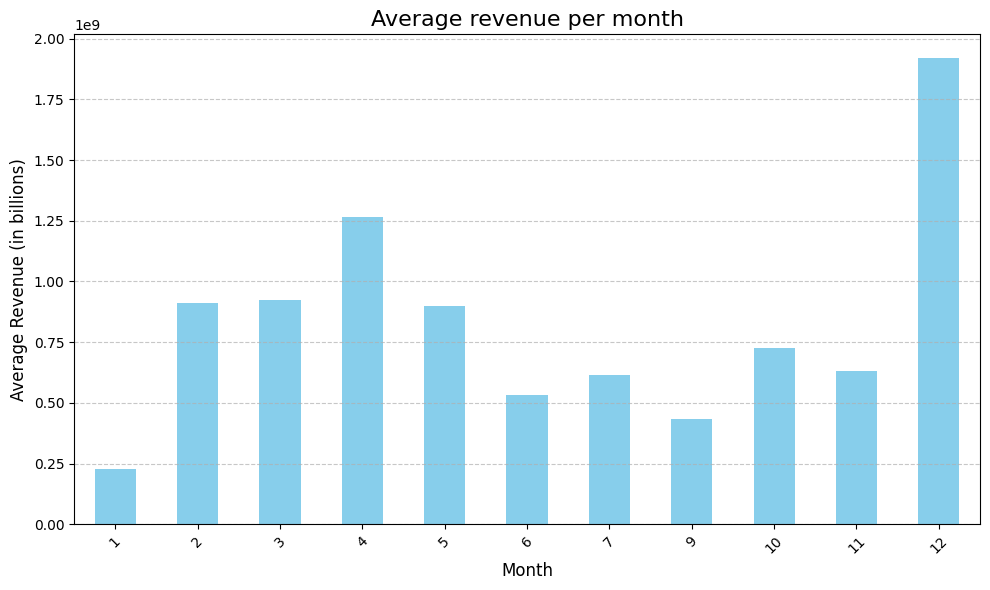

In [12]:
grouped_means.plot.bar(color='skyblue', figsize=(10,6))
plt.title('Average revenue per month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Revenue (in billions)', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

#### Conclusion: Movies released in late winter/early spring have the highest amount of success based on revenue, followed by late spring and mid-fall

## Question 2: What runtime correlates to the most revenue generated?

#### Create bins to group runtime segments by

In [13]:
bins = [90, 120, 150, 181]
labels = ['90-120', '120-150', '150-181'] 
marvel_movies_groupby_runtime = marvel_movies

#### Create new runtime category column using the bins provided

In [14]:
marvel_movies_groupby_runtime['runtime_category'] = pd.cut(marvel_movies_groupby_runtime['runtime'], bins=bins, labels=labels, include_lowest=True)

#### Group together the mean of runtime for each runtime segment

In [15]:
marvel_movies_grouped_runtime = marvel_movies_groupby_runtime.groupby('runtime_category', observed=False)['revenue'].mean()
print(marvel_movies_grouped_runtime)

runtime_category
90-120     4.853034e+08
120-150    9.796990e+08
150-181    1.353722e+09
Name: revenue, dtype: float64


#### Visualize the runtime segments for each movie

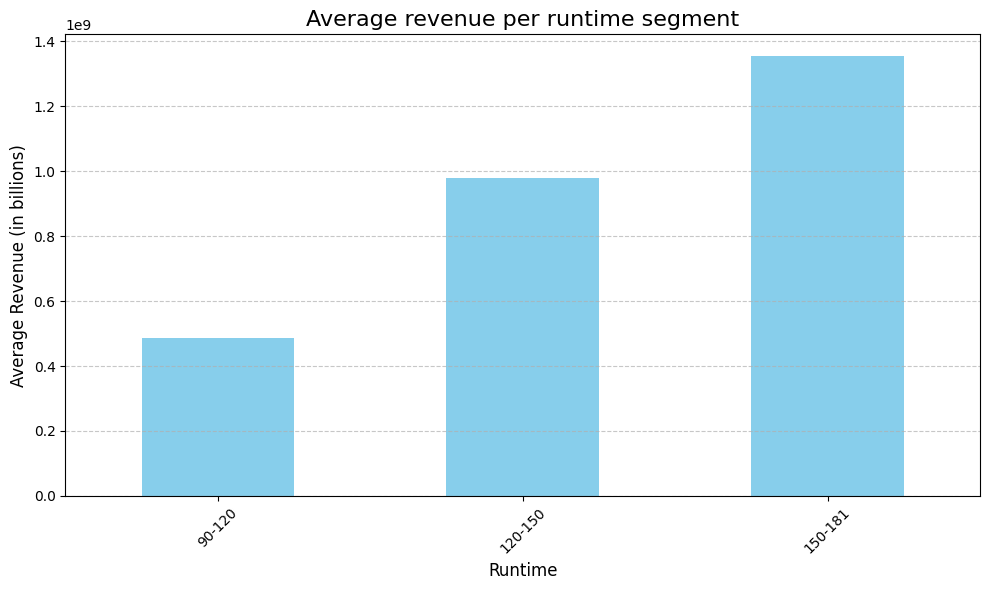

In [16]:
marvel_movies_grouped_runtime.plot.bar(color='skyblue', figsize=(10,6))
plt.title('Average revenue per runtime segment', fontsize=16)
plt.xlabel('Runtime', fontsize=12)
plt.ylabel('Average Revenue (in billions)', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

#### Conclusion: Movies with 120-150 minutes of runtime have the most revenue with an average of 979.69 million

## Question 3: What Marvel movie budget correlates to the most success?

#### Create new bins for grouping budget segments:

In [17]:
budget_bins = [110000000, 150000000, 200000000, 250000000, 365000000]
budget_labels = ['110000000-150000000', '150000000-200000000', '200000000-250000000', '250000000-365000000']
marvel_movies_groupby_budget = marvel_movies

#### Group together budget categories using bins

In [18]:
marvel_movies_groupby_budget['budget_category'] = pd.cut(marvel_movies_groupby_budget['budget'], bins=budget_bins, labels=budget_labels, include_lowest=True)
marvel_movies_grouped_budget = marvel_movies_groupby_budget.groupby('budget_category', observed=False)['revenue'].mean()
print(marvel_movies_grouped_budget)

budget_category
110000000-150000000    4.081848e+08
150000000-200000000    8.821286e+08
200000000-250000000    1.027864e+09
250000000-365000000    1.788201e+09
Name: revenue, dtype: float64


#### Visualize the budget categories

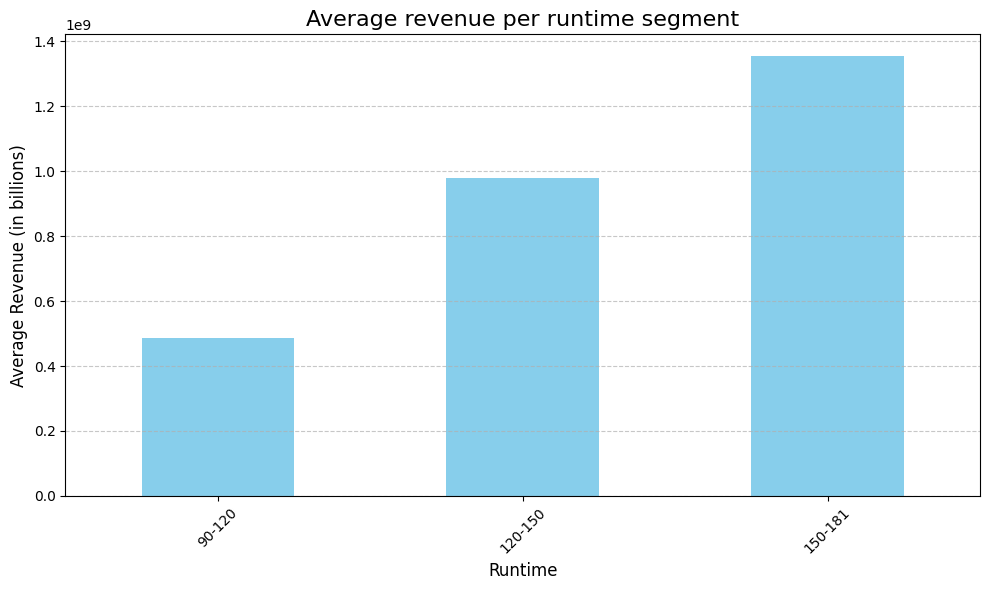

In [19]:
marvel_movies_grouped_runtime.plot.bar(color='skyblue', figsize=(10,6))
plt.title('Average revenue per runtime segment', fontsize=16)
plt.xlabel('Runtime', fontsize=12)
plt.ylabel('Average Revenue (in billions)', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

#### Conclusion: Movies in the 250000000-365000000 budget range have the highest average revenue

## Question #4: Which average vote score correlates to the most success?

#### Create bins for average vote score per movie

In [20]:
avg_vote_bins = [5.5, 6.5, 7.5, 8.5]
avg_vote_labels = ['5.5-6.5', '6.5-7.5', '7.5-8.5']

#### Group average vote segments togteher using bins

In [21]:
marvel_movies_groupby_avgvote = marvel_movies
marvel_movies_groupby_avgvote['avg_vote_cat'] = pd.cut(marvel_movies_groupby_avgvote['vote_average'], bins=avg_vote_bins, labels=avg_vote_labels, include_lowest=True)
marvel_movies_grouped_avgvote = marvel_movies_groupby_avgvote.groupby('avg_vote_cat', observed=False)['revenue'].mean()
print(marvel_movies_grouped_avgvote)

avg_vote_cat
5.5-6.5    4.130836e+08
6.5-7.5    8.175805e+08
7.5-8.5    1.214775e+09
Name: revenue, dtype: float64


# Conclusion: Movies in the 7.5-8.5 average vote range are the most successful


#### Create a correlation matrix to show which values are strongly/weakly correlated with one another

#### Group together budget categories using bins

In [22]:
print(marvel_movies.dtypes)
marvel_movies_numerized = marvel_movies.select_dtypes(exclude=['category'])
for col_name in marvel_movies_numerized.columns:
    if(marvel_movies_numerized[col_name].dtype == 'object'):
        marvel_movies_numerized[col_name] = marvel_movies_numerized[col_name].astype('category')
        marvel_movies_numerized[col_name] = marvel_movies_numerized[col_name].cat.codes

id                         int64
title                     object
vote_average             float64
vote_count                 int64
release_date              object
revenue                    int64
runtime                    int64
backdrop_path             object
budget                     int64
homepage                  object
imdb_id                   object
original_title            object
overview                  object
popularity               float64
poster_path               object
tagline                   object
genres                    object
production_companies      object
production_countries      object
spoken_languages          object
keywords                  object
release_month              int64
runtime_category        category
budget_category         category
avg_vote_cat            category
dtype: object


#### Look at which items have the highest correlation

In [23]:
cor_mat = marvel_movies_numerized.corr()
corr_pairs = cor_mat.unstack()
sorted_pairs = corr_pairs.sort_values()
high_corr = sorted_pairs[(sorted_pairs) > 0.5]
print(high_corr)

imdb_id               runtime                 0.506142
runtime               imdb_id                 0.506142
vote_count            revenue                 0.512352
revenue               vote_count              0.512352
vote_count            vote_average            0.541980
vote_average          vote_count              0.541980
release_date          popularity              0.560898
popularity            release_date            0.560898
id                    imdb_id                 0.609607
imdb_id               id                      0.609607
revenue               vote_average            0.631080
vote_average          revenue                 0.631080
                      runtime                 0.650538
runtime               vote_average            0.650538
revenue               runtime                 0.683742
runtime               revenue                 0.683742
budget                revenue                 0.706550
revenue               budget                  0.706550
imdb_id   

#### Visualize the correlation matrix

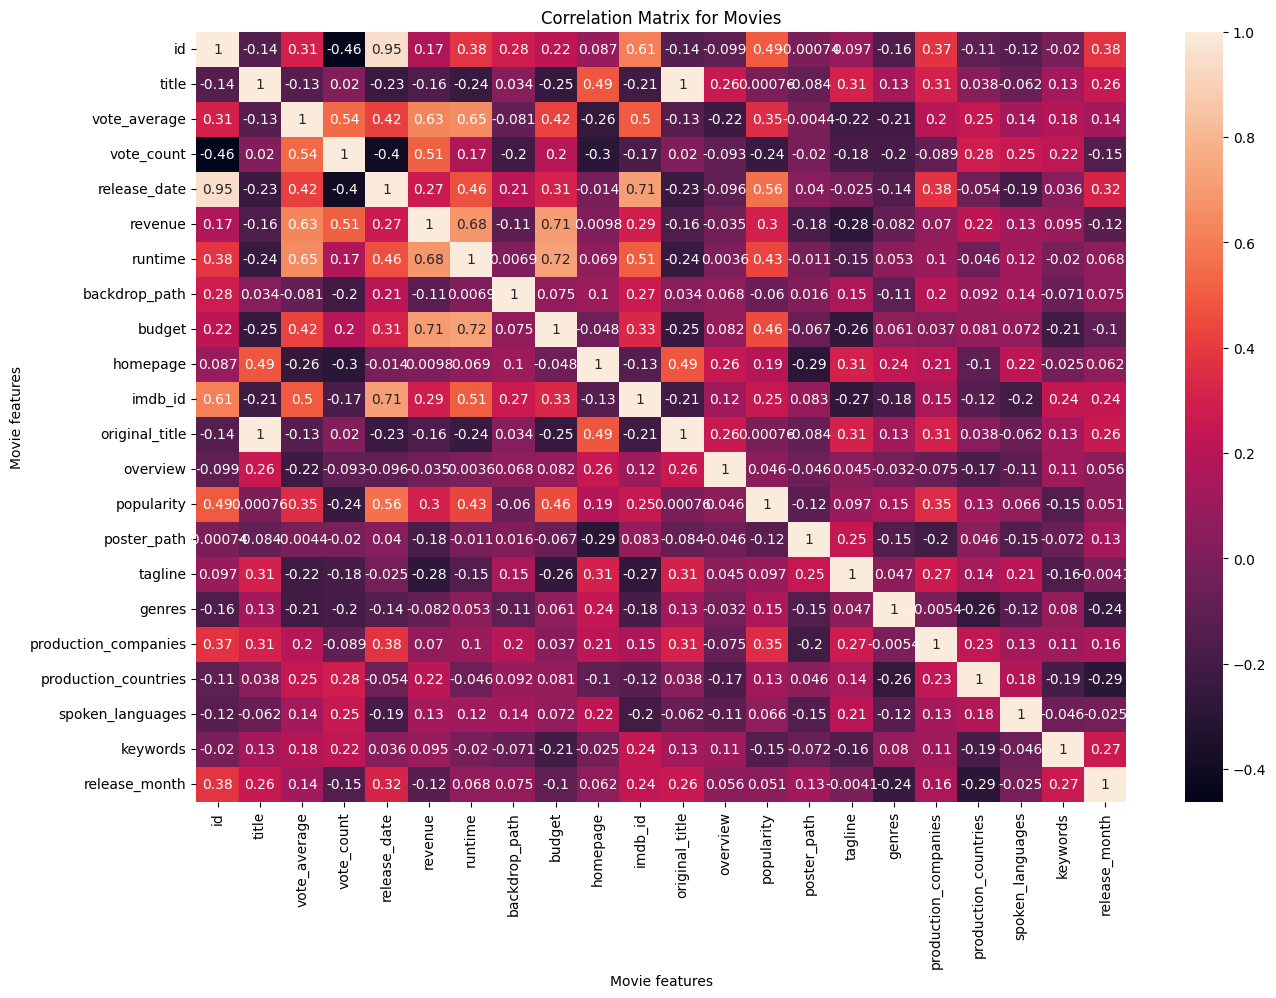

In [24]:
correlation_matrix = marvel_movies_numerized.corr(method = 'pearson')
plt.figure(figsize=(15, 10))  # Adjust the width and height in inches
sns.heatmap(correlation_matrix, annot = True)
plt.title("Correlation Matrix for Movies")
plt.xlabel("Movie features")
plt.ylabel("Movie features")
plt.show()

#### Conclusion: The factors that contribute to a movie's success the most in terms of revenue are runtime, budget, and average vote
